In [ ]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


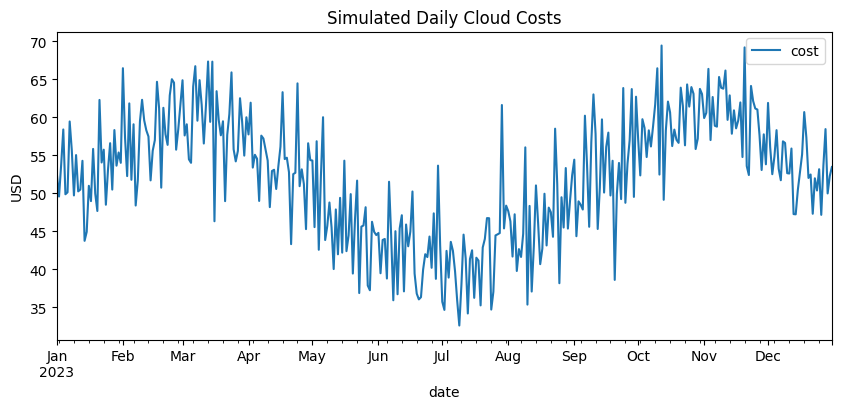

In [ ]:
# 🧪 Simulate synthetic daily cloud cost data
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=365)
costs = 50 + np.sin(np.linspace(0, 3*np.pi, 365)) * 10 + np.random.normal(0, 5, 365)

df = pd.DataFrame({'date': dates, 'cost': costs})
df.set_index('date', inplace=True)
df.plot(title='Simulated Daily Cloud Costs', figsize=(10, 4))
plt.ylabel('USD')
plt.show()


In [ ]:
# 🛠 Feature engineering: lag features and time features
df_feat = df.copy()
df_feat['dayofyear'] = df_feat.index.dayofyear
df_feat['lag1'] = df_feat['cost'].shift(1)
df_feat['lag2'] = df_feat['cost'].shift(2)
df_feat = df_feat.dropna()

X = df_feat[['dayofyear', 'lag1', 'lag2']]
y = df_feat['cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [ ]:
# 🤖 Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE: {mae:.2f}")


MAE: 5.21


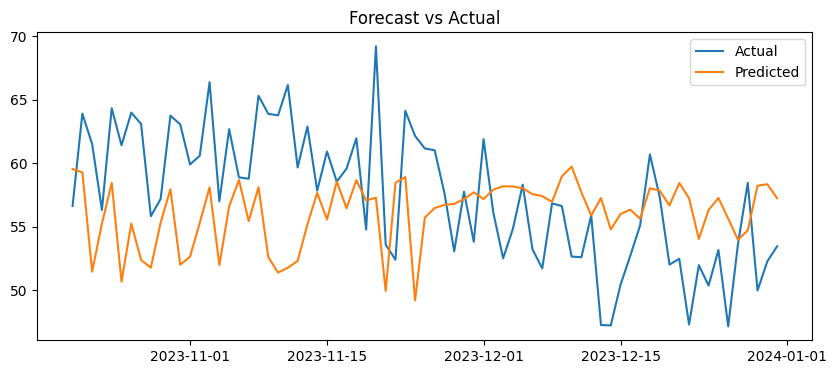

In [ ]:
# 📊 Plot actual vs predicted
plt.figure(figsize=(10,4))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.title('Forecast vs Actual')
plt.legend()
plt.show()
